# 1.0 Install Dependencies and Setup

In [1]:
#for cpu
!pip install opencv-python matplotlib

# for gpu
# !pip install opencv-headless matplotlib

In [2]:
import tensorflow as tf
import keras.api._v2.keras as keras
import os

# 2.0 Remove Dodgy Images

In [3]:
import cv2
import imghdr

In [10]:
data_dir = 'Concrete Crack Images for Classification'

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# 3.0  Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = keras.utils.image_dataset_from_directory('Concrete Crack Images for Classification')

Found 40000 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

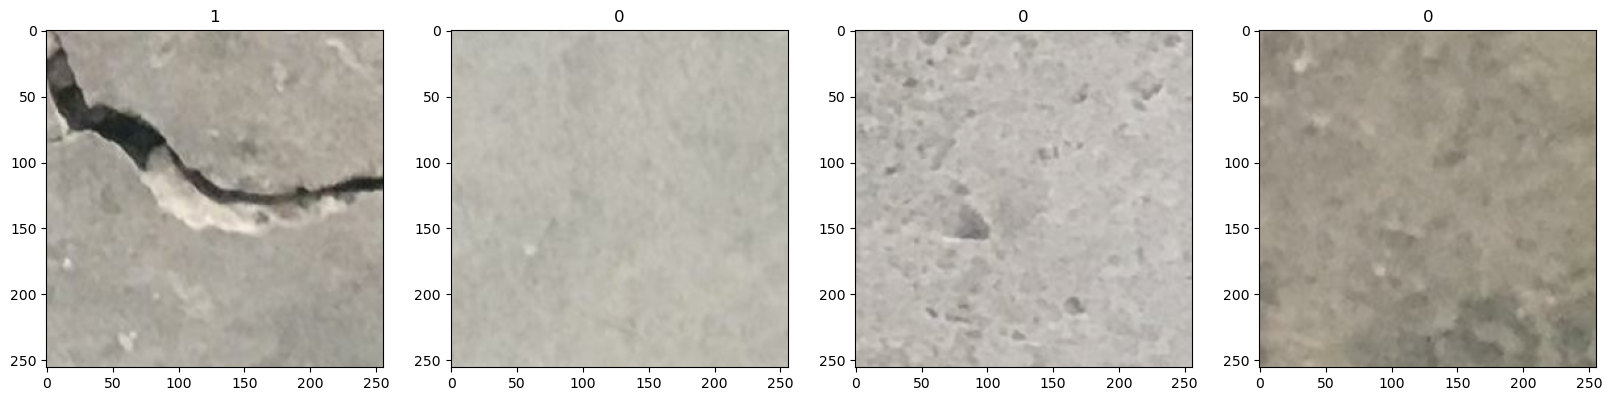

In [17]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4.0 Scale Data

In [18]:
data = data.map(lambda x,y: (x/255,y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.69411767, 0.6666667 , 0.63529414],
          [0.7266697 , 0.69921875, 0.6678462 ],
          [0.75019914, 0.72274816, 0.6913756 ],
          ...,
          [0.6627451 , 0.63529414, 0.6039216 ],
          [0.66207874, 0.63462776, 0.6032552 ],
          [0.65882355, 0.6313726 , 0.6       ]],
 
         [[0.7038833 , 0.6764323 , 0.64505976],
          [0.7283291 , 0.70087814, 0.6695056 ],
          [0.74319917, 0.7157482 , 0.68437564],
          ...,
          [0.6660003 , 0.6385493 , 0.6071768 ],
          [0.6658871 , 0.63843614, 0.6070636 ],
          [0.6653339 , 0.63788295, 0.6065104 ]],
 
         [[0.7199372 , 0.6924862 , 0.6611137 ],
          [0.73105705, 0.70360607, 0.67223346],
          [0.7357215 , 0.70827055, 0.676898  ],
          ...,
          [0.66947764, 0.64202666, 0.6106541 ],
          [0.66947764, 0.64202666, 0.6106541 ],
          [0.66947764, 0.64202666, 0.6106541 ]],
 
         ...,
 
         [[0.7372549 , 0.7019608 , 0.6745098 ],
          [0.73399

# 5.0 Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) # for tuning parameters like number of hidden layers/picking the best model
test_size = int(len(data)*.1) # solely for getting the performance of the model

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6.0 Building Deep Learning Model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary() # to see the overall structure of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

# 7.0 Train

In [28]:
logdir = 'logs'

In [29]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
print(train)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [31]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
875/875 [==============================] - 22123s 25s/step - loss: 0.2123 - accuracy: 0.9359 - val_loss: 0.0478 - val_accuracy: 0.9865
Epoch 2/5
875/875 [==============================] - 11603s 13s/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 3/5
875/875 [==============================] - 11861s 14s/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0452 - val_accuracy: 0.9871
Epoch 4/5
875/875 [==============================] - 12054s 14s/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 5/5
875/875 [==============================] - 11435s 13s/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0444 - val_accuracy: 0.9858


# 8.0 Plot Performance

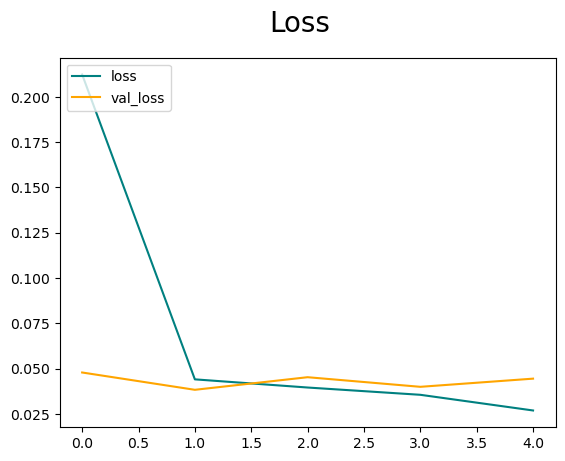

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

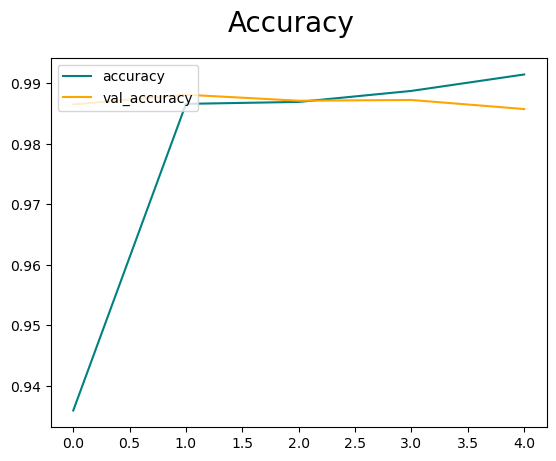

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 9.0 Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re =Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X,y = batch
    pred = model.predict(X)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

1/1 [==============================] - 4s 4s/step


In [37]:
print(pre.result().numpy, re.result().numpy, acc.result().numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.9819458>> <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.9908907>> <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.9865>>


# 10.0 Test

In [79]:
import cv2

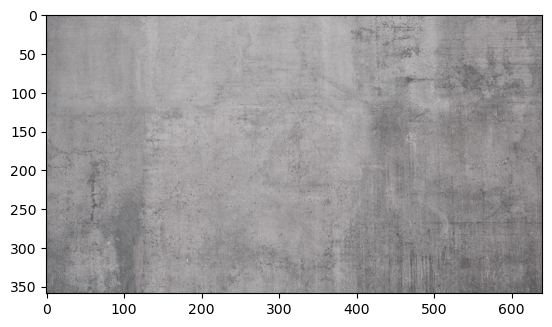

In [80]:
img = cv2.imread('train_2.jpg') 
plt.imshow(img)
plt.show()

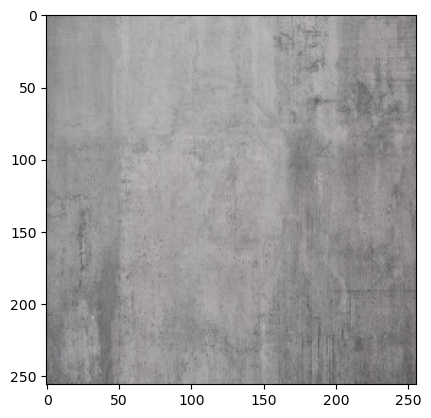

In [81]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 1s 1s/step


In [83]:
y_pred

array([[0.00213931]], dtype=float32)

In [84]:
if y_pred > 0.5:
  print(f'Predicted class is Positive Crack')
else:
  print(f'Predicted class is Negative Crack')

Predicted class is Negative Crack


# 11.0 Save the Model & Architecture

In [91]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [86]:
model.save(os.path.join('model', 'imgClassify_2.h5'))

# 12.0 Deploy Model to Make Prediction

In [87]:
load_model = load_model('./model/imgClassify_2.h5')

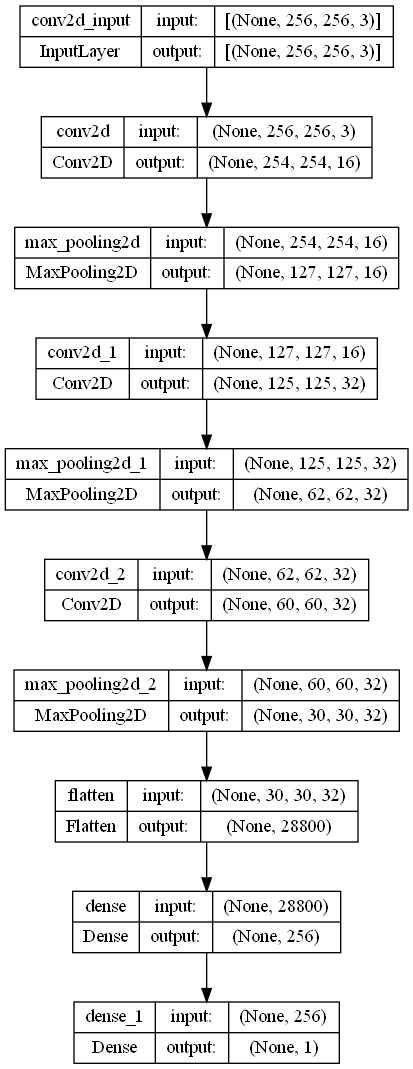

In [106]:
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [88]:
load_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 1s 1s/step


array([[0.00213931]], dtype=float32)

In [89]:
if y_pred > 0.5:
  print(f'Predicted class is Positive Crack')
else:
  print(f'Predicted class is Negative Crack')

Predicted class is Negative Crack
